## Visualizing cross-validation behavior in scikit-learn

In [1]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()

In [4]:
cv_results = cross_validate(lasso, X, y, cv=3,
                            return_train_score=False)
sorted(cv_results.keys())                         

cv_results['test_score']

array([0.33150734, 0.08022311, 0.03531764])

In [5]:
scores = cross_validate(lasso, X, y, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])      

print(scores['train_r2'])                         


[-3635.51152303 -3573.34242148 -6114.78229547]
[0.28010158 0.39088426 0.22784852]


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape


clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)                           


0.9666666666666667

In [9]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
scores                                              


array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [11]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)


In [12]:
from sklearn import metrics
scores = cross_val_score(
    clf, iris.data, iris.target, cv=5, scoring='f1_macro')
scores                                              


array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

In [13]:
from sklearn.model_selection import ShuffleSplit
n_samples = iris.data.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, iris.data, iris.target, cv=cv)  

array([0.97777778, 0.97777778, 1.        , 0.95555556, 1.        ])

In [14]:
def custom_cv_2folds(X):
    n = X.shape[0]
    i = 1
    while i <= 2:
        idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
        yield idx, idx
        i += 1

custom_cv = custom_cv_2folds(iris.data)
cross_val_score(clf, iris.data, iris.target, cv=custom_cv)

array([1.        , 0.97333333])

In [15]:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)  

0.9333333333333333

In [16]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cross_val_score(clf, iris.data, iris.target, cv=cv)

array([0.97777778, 0.93333333, 0.95555556, 0.93333333, 0.97777778])

In [17]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, iris.data, iris.target, scoring=scoring,
                        cv=5, return_train_score=False)
sorted(scores.keys())

scores['test_recall_macro']                       

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [18]:
from sklearn.metrics.scorer import make_scorer
scoring = {'prec_macro': 'precision_macro',
           'rec_micro': make_scorer(recall_score, average='macro')}
scores = cross_validate(clf, iris.data, iris.target, scoring=scoring,
                        cv=5, return_train_score=True)
sorted(scores.keys())                 


scores['train_rec_micro']       

array([0.975     , 0.975     , 0.99166667, 0.98333333, 0.98333333])

In [19]:
scores = cross_validate(clf, iris.data, iris.target,
                        scoring='precision_macro', cv=5,
                        return_estimator=True)
sorted(scores.keys())


['estimator', 'fit_time', 'score_time', 'test_score', 'train_score']

In [20]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))


[2 3] [0 1]
[0 1] [2 3]


In [21]:
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 0, 1])
X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]

In [22]:
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

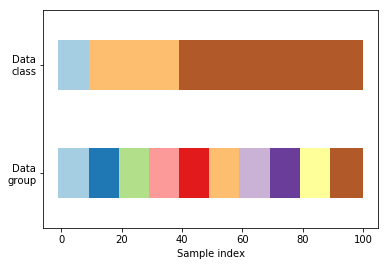

In [23]:
# Generate the class/group data
n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 10 for ii in range(10)])


def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker='_',
               lw=50, cmap=cmap_data)
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker='_',
               lw=50, cmap=cmap_data)
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5],
           yticklabels=['Data\ngroup', 'Data\nclass'], xlabel="Sample index")


visualize_groups(y, groups, 'no groups')

In [24]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

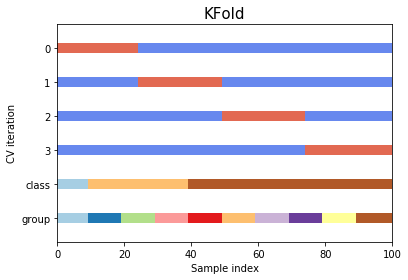

In [25]:
fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)

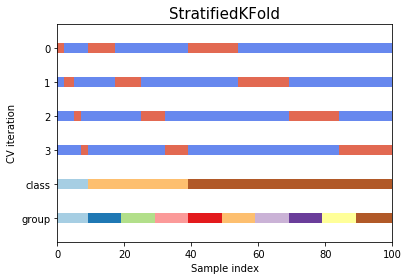

In [26]:
fig, ax = plt.subplots()
cv = StratifiedKFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)

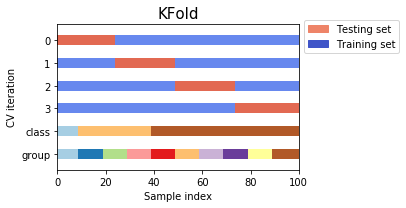

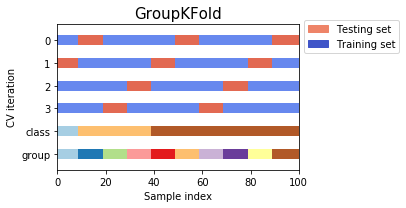

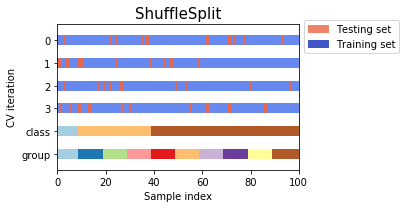

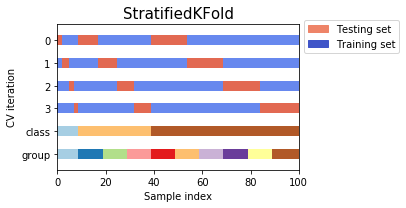

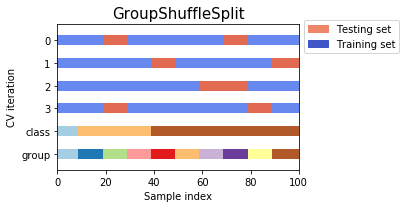

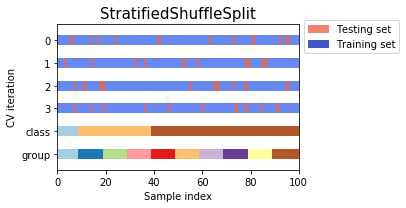

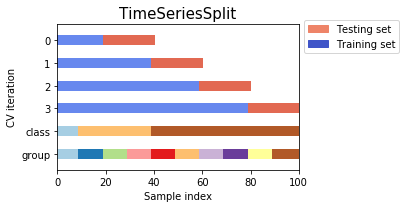

In [27]:
cvs = [KFold, GroupKFold, ShuffleSplit, StratifiedKFold,
       GroupShuffleSplit, StratifiedShuffleSplit, TimeSeriesSplit]


for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=.7)
plt.show()